<a href="https://www.kaggle.com/code/nickkrikota/financial-analysis-and-prediction?scriptVersionId=160173852" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Intro

This notebook will go over aspects of financial analysis such as return on investment, volatility and correlation using libraries such as yfinance, pandas, xgboost and matplotlib. Note that this is an exercise in Python rather than financial advice.

In [1]:
!pip install yfinance # install the yfinance library

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.8 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 6.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290465 sha256=533d3d10b532073b3392fa66ac6fc79426f4cdedc220e1746977f6fd2fb7f827
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee


In [2]:
# Import libraries

import yfinance as yf
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')
colors = plt.get_cmap('tab10')

print('Imported Successfully')

Imported Successfully


# Analysis

In this section we will analyze a stock by itself and as a part of a portfolio.

## Single Stock

Let's start by analyzing Intel's stock (INTC) yearly return and volatility over a period of 10 years.

In [3]:
INTC = yf.download('INTC', start='2014-01-01', end='2024-01-01')
INTC

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,25.780001,25.820000,25.469999,25.790001,19.435654,31833300
2014-01-03,25.860001,25.900000,25.600000,25.780001,19.428118,27796700
2014-01-06,25.770000,25.790001,25.450001,25.459999,19.186962,28682300
2014-01-07,25.540001,25.730000,25.469999,25.590000,19.284931,19665100
2014-01-08,25.639999,25.709999,25.299999,25.430000,19.164352,29680500
...,...,...,...,...,...,...
2023-12-22,47.250000,48.160000,47.200001,48.000000,48.000000,30053700
2023-12-26,48.919998,50.520000,48.709999,50.500000,50.500000,60287400
2023-12-27,50.630001,51.279999,50.189999,50.759998,50.759998,52148000


### Graph the stock price over time

We will use adjusted close for this analysis as it more accurately reflects historical prices.

<Axes: xlabel='Date'>

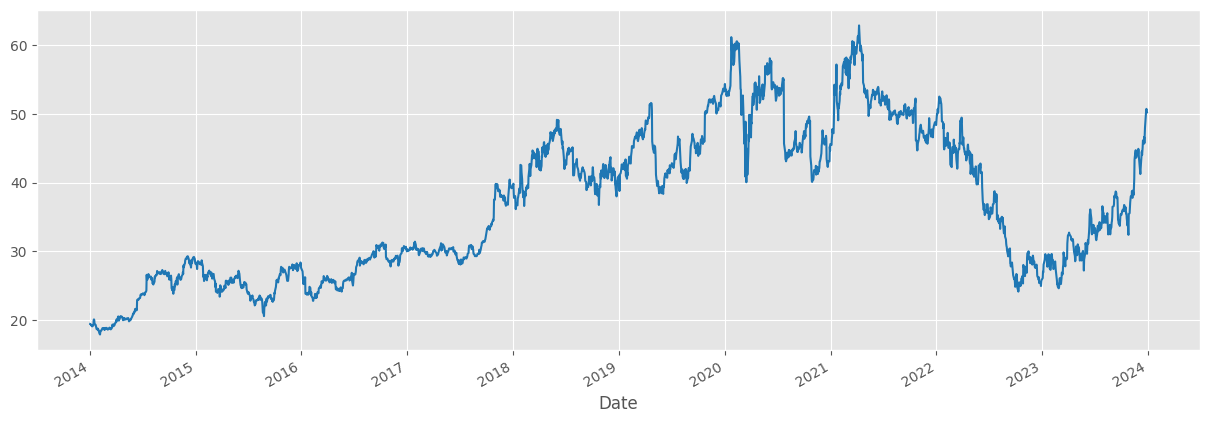

In [4]:
INTC['Adj Close'].plot(figsize=(15, 5), colormap=colors)

### Annualized Return

The logarithmic rate of return is used as it is more suited for analyzing a single stock.

In [5]:
# average of log of daily return
# multiplied by 250 which is roughly the number of trading days to annualize it

INTCreturn = (np.log(INTC['Adj Close'] / INTC['Adj Close'].shift(1))).mean() * 250 
print(f'INTC Annualized Rate of Return: {round(INTCreturn * 100, 2)}%')

INTC Annualized Rate of Return: 9.44%


### Annualized Volatility

Also known as risk.

In [6]:
# average of log of daily return
# standard deviation multiplied by square root of 250

INTCrisk = (np.log(INTC['Adj Close'] / INTC['Adj Close'].shift(1))).std() * 250 ** 0.5
print(f'INTC Annualized Volatility: {round(INTCrisk * 100, 2)}%')

INTC Annualized Volatility: 32.49%


## Portfolio

Let's analyze this stock as a part of portfolio of stocks from various sectors. The function below creates a dataframe with the selected stocks and their adjusted close prices.

In [7]:
stocks = ['INTC', 'MSFT', 'JNJ', 'JPM', 'ORCL', 'CAT', 'IBM', 'CSCO', 'CVX', 'UPS']

def create_portfolio(stocks):
    portfolio = pd.DataFrame()
    for stock in stocks:
        stock_data = yf.download(stock, start='2014-01-01', end='2024-01-01')['Adj Close']
        portfolio[stock] = stock_data
    return portfolio

portfolio = create_portfolio(stocks)
portfolio

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,INTC,MSFT,JNJ,JPM,ORCL,CAT,IBM,CSCO,CVX,UPS
Date,,,,,,,,,,
2014-01-02,19.435654,31.290827,69.339195,44.047379,32.275021,67.803925,116.571358,16.095112,81.588295,75.961586
2014-01-03,19.428118,31.080305,69.963806,44.387897,32.189449,67.766197,117.268761,16.080477,81.726341,75.792465
2014-01-06,19.186962,30.423506,70.329445,44.645157,32.061119,66.875938,116.866684,16.102425,81.509430,74.807289
2014-01-07,19.284931,30.659269,71.822403,44.130615,32.386261,67.094727,119.197670,16.321903,82.199524,75.049904
2014-01-08,19.164352,30.111952,71.723381,44.546791,32.275024,67.253166,118.104431,16.307276,81.029640,74.991089
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,48.000000,374.579987,155.460007,166.374069,105.790077,289.020966,162.139999,49.703243,151.050003,158.250000
2023-12-26,50.500000,374.660004,156.139999,167.358017,105.780121,294.266693,163.210007,49.891773,152.410004,158.029999
2023-12-27,50.759998,374.070007,156.350006,168.361816,105.531090,296.745209,163.460007,50.050541,151.910004,156.839996


### Graph The Price of Each Stock in The Portfolio Over Time

The prices are normalzied to 100 to better illustrate the comparison.

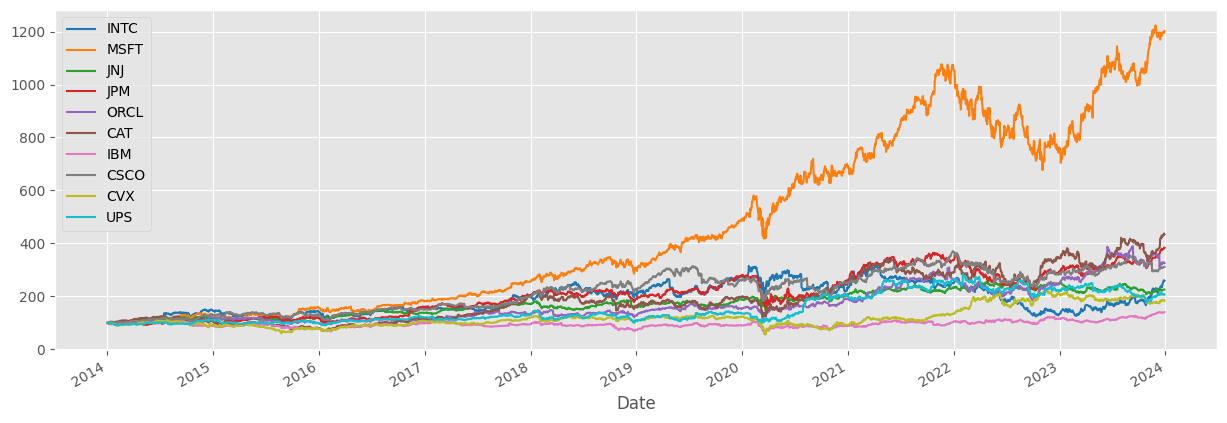

In [8]:
(portfolio / portfolio.iloc[0] * 100).plot(figsize=(15, 5),colormap=colors);
plt.show()

### Correlation

Correlation between the rate of returns of stocks in the portfolio. Note the difference between sectors.

In [9]:
corr = np.log(portfolio / portfolio.shift(1)).corr()
corr

,INTC,MSFT,JNJ,JPM,ORCL,CAT,IBM,CSCO,CVX,UPS
INTC,1.000000,0.581734,0.334513,0.450965,0.435948,0.411955,0.452467,0.523940,0.371538,0.415652
MSFT,0.581734,1.000000,0.408619,0.462750,0.550809,0.395434,0.450750,0.577364,0.366182,0.453252
JNJ,0.334513,0.408619,1.000000,0.413416,0.397232,0.349675,0.446840,0.468036,0.365459,0.377167
JPM,0.450965,0.462750,0.413416,1.000000,0.474559,0.606054,0.551811,0.507703,0.605678,0.475953
ORCL,0.435948,0.550809,0.397232,0.474559,1.000000,0.402476,0.478613,0.526619,0.350350,0.444145
CAT,0.411955,0.395434,0.349675,0.606054,0.402476,1.000000,0.490831,0.469091,0.571759,0.448712
IBM,0.452467,0.450750,0.446840,0.551811,0.478613,0.490831,1.000000,0.539807,0.470244,0.407876
CSCO,0.523940,0.577364,0.468036,0.507703,0.526619,0.469091,0.539807,1.000000,0.417081,0.460969
CVX,0.371538,0.366182,0.365459,0.605678,0.350350,0.571759,0.470244,0.417081,1.000000,0.353738
UPS,0.415652,0.453252,0.377167,0.475953,0.444145,0.448712,0.407876,0.460969,0.353738,1.000000


### Correlation Visualized as a Heatmap

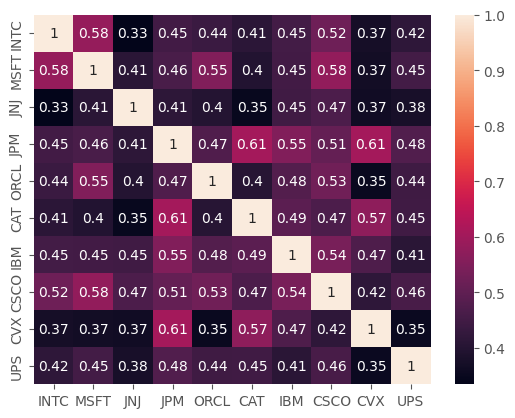

In [10]:
sns.heatmap(corr, annot=True)
plt.show()

### Return of Each Stock in The Portofolio

Here we use simple rate of return when comparing the returns of a group of stocks.

In [11]:
# average of daily return
# multiplied by 250 which is roughly the number of trading days to annualize it

roi = ((portfolio / portfolio.shift(1)) - 1).mean() * 250
roi

INTC    0.147047
MSFT    0.283577
JNJ     0.097189
JPM     0.169637
ORCL    0.151581
CAT     0.188612
IBM     0.060690
CSCO    0.143947
CVX     0.103471
UPS     0.102215
dtype: float64

### Portfolio Annualized Return

Each stock is given an equal weight of 10% of a portfolio. Adjust the weights to see the difference in the annualized return.

In [12]:
weights = np.array([0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10])
round(np.dot(roi, weights) * 100, 2)
print(f'Portfolio Annualized Return: {round(np.dot(roi, weights) * 100, 2)}%')

Portfolio Annualized Return: 14.48%


### Volatility of Each Stock in The Portfolio

In [13]:
# average of log of daily return
# standard deviation multiplied by square root of 250

stock_volatility = np.log(portfolio / portfolio.shift(1)).std() * 250 ** 0.5
stock_volatility

INTC    0.324865
MSFT    0.269441
JNJ     0.179597
JPM     0.267957
ORCL    0.261673
CAT     0.292300
IBM     0.232932
CSCO    0.249339
CVX     0.295694
UPS     0.244326
dtype: float64

### Portfolio Annualized Volatility

Each stock is given an equal weight of 10% of a portfolio. Adjust the weights to see the difference in the annualized volatility. Note the decrease in volatility of the portfolio compared to the volatility of a single stock.

In [14]:
# covariance of log of daily return
# standard deviation multiplied by square root of 250

weights = np.array([0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10])
portoflio_volatility = (np.dot(weights.T, np.dot(np.log(portfolio / portfolio.shift(1)).cov() * 250, weights))) ** 0.5
print(f'Portfolio Annualized Volatility: {round(portoflio_volatility * 100, 2)}%')

Portfolio Annualized Volatility: 18.77%


# Closing Price Prediction

We will use a simple XGBoost regression to predict today's closing price given the information we have from the previous day.

### Feature Engineering

Let's create a few features with the given data.

In [15]:
INTC['Yesterday Close'] = INTC['Close'].shift(1) # Closing price from the previous day
INTC['Yesterday Volume'] = INTC['Volume'].shift(1) # Volume from the previous day
INTC['Yesterday High/Low Difference'] = INTC['High'].shift(1) - INTC['Low'].shift(1) # Difference between High and Low price on the previous day
INTC['Yesterday Open/Close Difference'] = INTC['Open'].shift(1) - INTC['Close'].shift(1) # Difference between Open and Close price on the previous day
INTC = INTC.dropna() # Drop dates with NaN values
INTC

,Open,High,Low,Close,Adj Close,Volume,Yesterday Close,Yesterday Volume,Yesterday High/Low Difference,Yesterday Open/Close Difference
Date,,,,,,,,,,
2014-01-03,25.860001,25.900000,25.600000,25.780001,19.428118,27796700,25.790001,31833300.0,0.350000,-0.010000
2014-01-06,25.770000,25.790001,25.450001,25.459999,19.186962,28682300,25.780001,27796700.0,0.299999,0.080000
2014-01-07,25.540001,25.730000,25.469999,25.590000,19.284931,19665100,25.459999,28682300.0,0.340000,0.310001
2014-01-08,25.639999,25.709999,25.299999,25.430000,19.164352,29680500,25.590000,19665100.0,0.260000,-0.049999
2014-01-09,25.420000,25.549999,25.250000,25.309999,19.073917,20878000,25.430000,29680500.0,0.410000,0.209999
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,47.250000,48.160000,47.200001,48.000000,48.000000,30053700,47.080002,28320500.0,1.099998,-0.600002
2023-12-26,48.919998,50.520000,48.709999,50.500000,50.500000,60287400,48.000000,30053700.0,0.959999,-0.750000
2023-12-27,50.630001,51.279999,50.189999,50.759998,50.759998,52148000,50.500000,60287400.0,1.810001,-1.580002


### Split the data

Now we will split the data into a training set and a testing set with an approximately 90%/10% split.

In [16]:
train = INTC.loc[INTC.index < '01-01-2023'] # data before January 1, 2023
test = INTC.loc[INTC.index >= '01-01-2023'] # data after January 1, 2023

daystotal = len(train) + len(test)
print(f'Train Data Percentage: {round((len(train) / daystotal) * 100, 2)}%')
print(f'Test Data Percentage: {round((len(test) / daystotal) * 100, 2)}%')

Train Data Percentage: 90.06%
Test Data Percentage: 9.94%


### Graph the Split Data

Here we will look at the 'Close' value rather than the 'Adjusted Close' because we will be taking a closer look at the last year rather than the older historic prices.

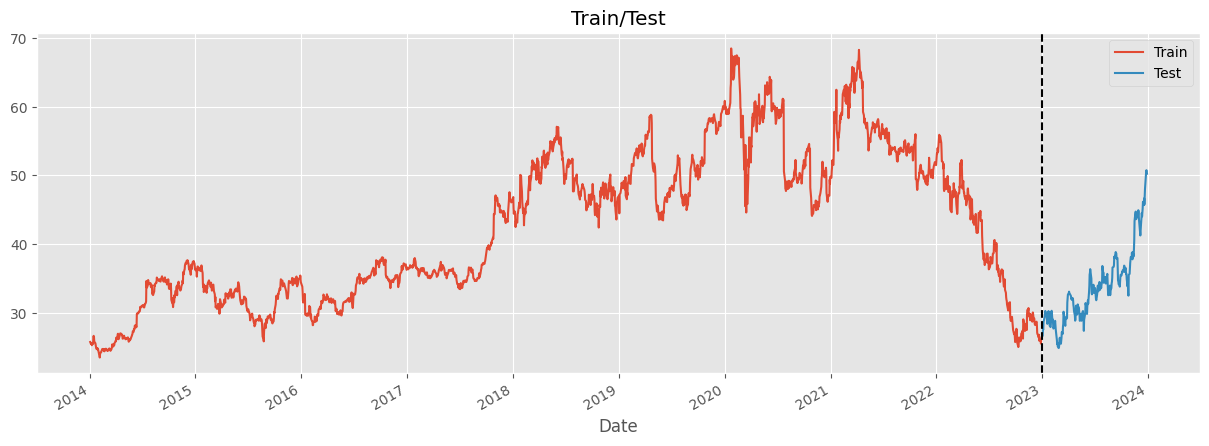

In [17]:
ig, ax = plt.subplots(figsize=(15, 5))
train['Close'].plot(ax=ax, label='Train', title='Train/Test')
test['Close'].plot(ax=ax, label='Test')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Train', 'Test'])
plt.show()

### Fit The Model

We will use just the yesterday's close price rather than the other features because it will gives us a slightly better accuracy.

In [18]:
# X = ['Yesterday Close', 'Yesterday Volume', 'Yesterday Open/Close Difference', 'Yesterday High/Low Difference']
X = ['Yesterday Close'] # features
y = 'Close' # target

model = xgb.XGBRegressor()
model.fit(train[X], train[y])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Measure The Accuracy

A score is given to the model based on how close it is to the actual data.

In [19]:
predict = model.predict(test[X])
accuracy = model.score(test[X], test[y])
print(f'Prediction Accuracy: {round(accuracy * 100, 2)}%')

Prediction Accuracy: 97.62%


### Plot The Predicted Data Over Historical Data

How do the predictions compare?

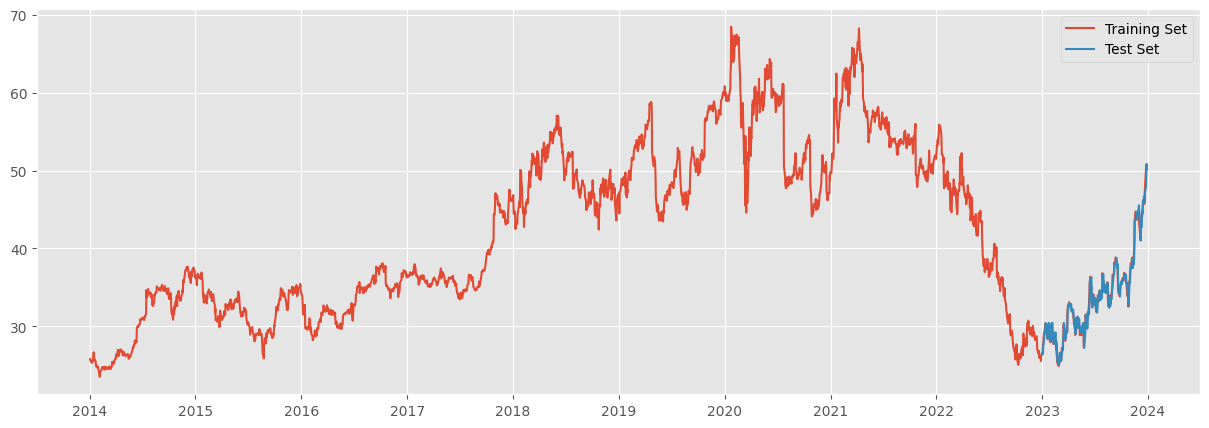

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(INTC['Close'])
plt.plot(test[y].index, predict)
ax.legend(['Training Set', 'Test Set'])
plt.show()

### Zoom in on Year 2023 (Test Set)

While this only predicts one day ahead, other more sophisticated models are able to forecast further into the future. I hope to explore those in later notebooks.

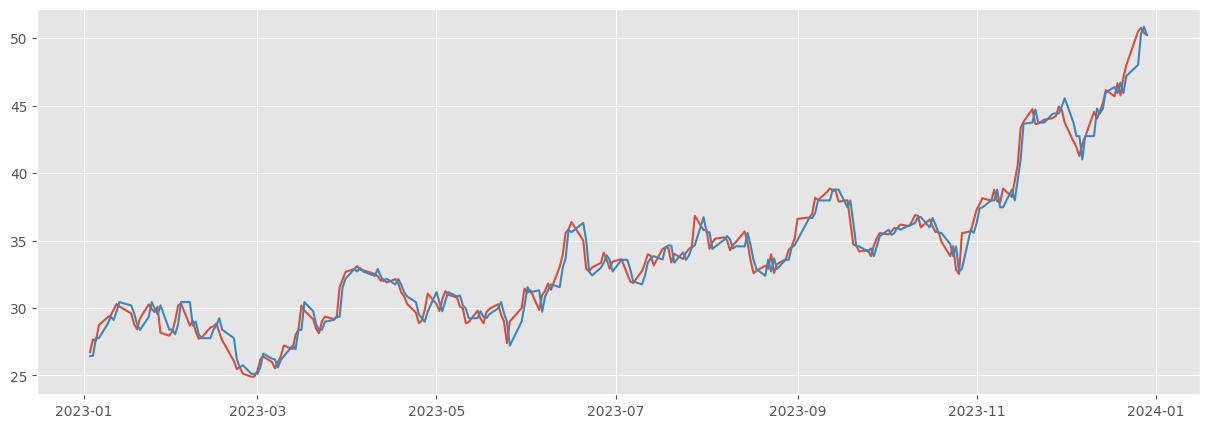

In [21]:
y2023 = INTC.loc[INTC.index > '01-01-2023']

fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(y2023['Close'])
plt.plot(test[y].index, predict)
plt.show()

# Conclusion

Thank you for reading. All feedback is welcome.